In [1]:
# General (scientific) computing
import os
import time
import glob
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import matplotlib as mpl
from matplotlib.patches import Ellipse
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['image.cmap'] = 'Greys_r'

# Astronomical computing
import fitsio
from astropy.visualization import simple_norm, AsinhStretch
#import astroalign as aa
import sep
import scipy
import astropy.io.fits as fits
from astropy.wcs import WCS
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u

# Your Image Calibration and Photometry Code
from complete_process import average_bias, average_dark, average_flat, science_exposure
# Note that you do not need to have magnitude errors implemented. That is for lab 1.5! Returning 0 for all
# magnitude errors is fine for now.
from photometry import create_phot_cat, aper_flux, multi_ellipse_aper_flux, aper_mag

## Fluxes

2710.3935356140137
Flux: 287402.2673527743
Flux err: 74.89633692822656


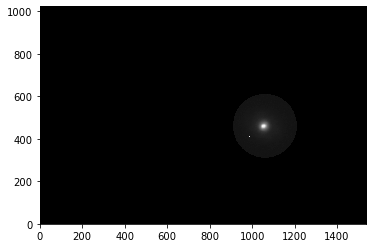

In [2]:
# M94 R Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_R.fit', header=True)
print(np.median(im))
#print(3*60 + 6 * 15)# + 4 * 15)

rfl1, rerrl1, risl1, rib1 = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[40], b_list=[40], 
                                        h_list=[1055], k_list=[460],
                                        bgx=1055, bgy=460, background_width=400, angles=[0], gain=1.2706268068331685,
                                        nimages1=9, nimages2=4, errFlag=True, 
                                        read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                        avg_dark_current1=0.07143249638710437, 
                                        avg_dark_current2=0.07738150368580866,exptime1=270, exptime2=60)
rfl, rerrl, risl, rib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[150], b_list=[150], 
                                        h_list=[1055], k_list=[460],
                                        bgx=1055, bgy=460, background_width=400, angles=[0], gain=1.2706268068331685,
                                        nimages1=9, nimages2=4, errFlag=True, 
                                        read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                        avg_dark_current1=0.07143249638710437, 
                                        avg_dark_current2=0.07738150368580866,exptime1=270, exptime2=60)
#rfl, rerrl, risl, rib = aper_flux(im, 1055, 460, source_radius=(150), background_width=(400), exptime=330)

r_mag, r_magerr = aper_mag(rfl[0], rerrl[0])
R_inst_flux = rfl[0]
R_inst_flux_err = rerrl[0]
plt.imshow(im * risl[0])
print("Flux:", rfl[0])
print("Flux err:", rerrl[0])

330.0
Flux: 4432.662654474697
Flux err: 9.69137973691987


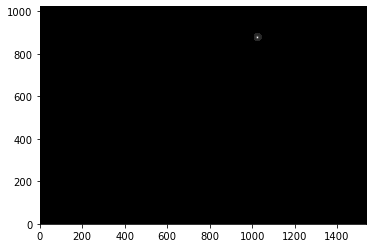

In [3]:
# BD+42 R Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_R.fit', header=True)
print(header['EXPTIME'])
#print(3*60 + 6 * 15)# + 4 * 15)

rfl, rerrl, risl, rib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[20], b_list=[20], 
                                        h_list=[1021], k_list=[877],
                                        bgx=1021, bgy=877, background_width=90, angles=[0], gain=1.2706268068331685,
                                        nimages1=9, nimages2=4, errFlag=True, 
                                        read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                        avg_dark_current1=0.07143249638710437, 
                                        avg_dark_current2=0.07738150368580866,exptime1=270, exptime2=60)

#rfl, rerrl, risl, rib = aper_flux(im, 1021, 877, source_radius=(20), background_width=(90), exptime=330)
#rfl[0] /= 100000
ref_r_mag, ref_r_magerr = aper_mag(rfl[0], rerrl[0])
plt.imshow(im * (risl[0]))
print("Flux:", rfl[0])
print("Flux err:", rerrl[0])

7500.0
Flux: 8334.670438430267
Flux err: 2.6124416535255532


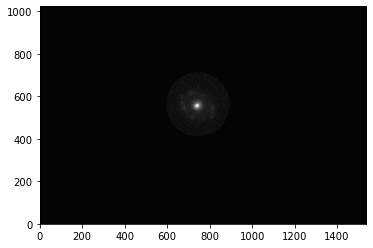

In [4]:
# M94 Ha Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_Ha.fit', header=True)
print(header['EXPTIME'])

hafl1, haerrl1, haisl1, haib1 = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[40], b_list=[40],
                                        h_list=[740], k_list=[561],
                                        bgx=740, bgy=561, background_width=400, angles=[0], gain=1.2706268068331685,
                                        nimages1=85, nimages2=35, errFlag=True, 
                                        read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                        avg_dark_current1=0.07143249638710437, 
                                        avg_dark_current2=0.07738150368580866,exptime1=85*60, exptime2=35*60)
hafl, haerrl, haisl, haib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[150], b_list=[150],
                                        h_list=[740], k_list=[561],
                                        bgx=740, bgy=561, background_width=400, angles=[0], gain=1.2706268068331685,
                                        nimages1=85, nimages2=35, errFlag=True, 
                                        read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                        avg_dark_current1=0.07143249638710437, 
                                        avg_dark_current2=0.07738150368580866,exptime1=85*60, exptime2=35*60)
#hafl, haerrl, haisl, haib = aper_flux(im, 740, 561, source_radius=(150), background_width=(400), exptime=7500)

ha_mag, ha_magerr = aper_mag(hafl[0], haerrl[0])
Ha_inst_flux = hafl[0]
Ha_inst_flux_err = haerrl[0]
plt.imshow(im * (haisl[0]))
print("Flux:", hafl[0])
print("Flux err:", haerrl[0])

7500.0
Flux: 77.66101620286551
Flux err: 0.33584905836061213


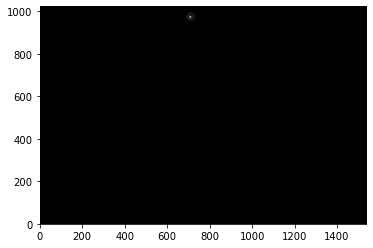

In [5]:
# BD+42 Ha Flux
im, header = fitsio.read('./data/Coadded_Data/coadded_Ha.fit', header=True)
print(header['EXPTIME'])

hafl, haerrl, haisl, haib = multi_ellipse_aper_flux(im, n_ellipses=1, a_list=[20], b_list=[20], 
                                        h_list=[706], k_list=[973],
                                        bgx=706, bgy=973, background_width=90, angles=[0], gain=1.2706268068331685,
                                        nimages1=85, nimages2=35, errFlag=True, 
                                        read_noise1=3.4934947763773803, read_noise2=3.1409296805752427, 
                                        avg_dark_current1=0.07143249638710437, 
                                        avg_dark_current2=0.07738150368580866,exptime1=85*60, exptime2=35*60)
#hafl, haerrl, haisl, haib = aper_flux(im, 706, 973, source_radius=(20), background_width=(90), exptime=7500)

ref_ha_mag, ref_ha_magerr = aper_mag(hafl[0], haerrl[0])
plt.imshow(im * (haisl[0]))
print("Flux:", hafl[0])
print("Flux err:", haerrl[0])

## Differential Photometry

In [6]:
ref_true_mag = 13.10

In [7]:
# We have to do error propogation here
corrected_mag_R = ref_true_mag - ref_r_mag + r_mag
corrected_mag_Rerr = np.sqrt(ref_r_magerr ** 2 + r_magerr ** 2)
fluxR = 10 ** (-corrected_mag_R/2.5)
fluxR_err = np.sqrt(corrected_mag_Rerr ** 2 * (-0.921034*np.exp(-0.921034 * corrected_mag_Rerr)) ** 2)
fluxR, fluxR_err, corrected_mag_R, corrected_mag_Rerr

(0.00037310022351709087,
 0.002196989324245229,
 8.570436226954278,
 0.0023906088757288868)

In [8]:
# We have to do error propogation here
corrected_mag_Ha = ref_true_mag - ref_r_mag + ha_mag
corrected_mag_Haerr = corrected_mag_Rerr#np.sqrt(ref_ha_magerr ** 2) #+ ha_magerr ** 2
fluxHa = 10 ** (-corrected_mag_Ha/2.5)
fluxHa_err = np.sqrt(corrected_mag_Haerr ** 2 * (-0.921034*np.exp(-0.921034 * corrected_mag_Haerr)) ** 2)
fluxHa, fluxHa_err, corrected_mag_Ha, corrected_mag_Haerr

(1.0819912564234004e-05,
 0.002196989324245229,
 12.414440621877718,
 0.0023906088757288868)

In [9]:
corrected_mag_R, corrected_mag_Ha

(8.570436226954278, 12.414440621877718)

## Flux Subtraction

In [10]:
DW = 13462.1 / 306.75
DW

43.88622656886716

In [11]:
# Now we will calculate the difference in Flux
# We have to do error propogation here
dF = 10 ** (2.5 * corrected_mag_Ha) - (10 ** (2.5 * corrected_mag_R) / DW)
dFerr = np.sqrt((corrected_mag_Haerr ** 2) * (5.756 * np.exp(5.756 * corrected_mag_Haerr)) ** 2 + (corrected_mag_Rerr ** 2) * (5.756 * np.exp(5.756 * corrected_mag_Rerr)) ** 2)
print("Flux difference is", dF)
print("Flux difference error is", dFerr)  # This might be fixed if the error in the photometry aper_flux
                                          # is fixed

Flux difference is 1.0866797012646637e+31
Flux difference error is 0.019729694131656112


## Luminosity

In [12]:
h = scipy.constants.h
c = scipy.constants.c

In [13]:
c,h

(299792458.0, 6.62607015e-34)

In [14]:
# Don't worry about this error propagation
R_avg_lambda = 658
R_photon_energy = h * c * 10**9 / R_avg_lambda
Ha_avg_lambda = 656.3
Ha_photon_energy = h * c * 10**9 / Ha_avg_lambda
print(R_photon_energy, Ha_photon_energy, R_photon_energy / Ha_photon_energy)

3.0189146765181287e-19 3.0267345073120964e-19 0.9974164133738601


In [15]:
h = scipy.constants.h
c = scipy.constants.c
def turn_into_wattsm2(rate, rate_err, area, lam):
    """Turn
        - rate, which is in photons / second,
        - area, which is area of the primary mirror in m^2,
        - lam, which is in nm
    into Watts / m^2
    """
    energy = h * c * 10**9 / lam
    return energy * rate / area, rate_err * energy / area
    
# These lines are a test
rate = 100
rate_err = 10
r = 24 * 2.54 # cm
area = (r ** 2) / 10000  # m^2
lam = 658
print(area, "m mirror")
print(rate, "photons per second are detected by CCD")
print(lam, "nm avg wavelength of light let in by filter")
print(turn_into_wattsm2(rate, rate_err, area, lam), "W/m^2")

0.37161215999999997 m mirror
100 photons per second are detected by CCD
658 nm avg wavelength of light let in by filter
(8.123831783432838e-17, 8.123831783432837e-18) W/m^2


In [16]:
r = 12 * 2.54 * 0.01 # m  TODO: subtract inner hole radius
area = np.pi * (r ** 2) # m^2
wattsR, wattsR_err = turn_into_wattsm2(fluxR, fluxR_err, area, R_avg_lambda)
print(wattsR, wattsR_err)
wattsHa, wattsHa_err = turn_into_wattsm2(fluxHa, fluxHa_err, area, Ha_avg_lambda)
print(wattsHa, wattsHa_err)
difference = wattsHa - wattsR / DW
cov = 0
dif_err = np.sqrt((wattsHa_err ** 2) + ((wattsR_err ** 2) / (DW ** 2)) - (2 * cov / DW))
print(difference)
print(dif_err)

3.8591934581341877e-22 2.2724743361965457e-21
1.122065685880032e-23 2.2783606783747175e-21
2.4270244145110795e-24
2.2789490245705326e-21


In [17]:
dv = (c * (10 ** 9)/300) - (c * (10 ** 9)/500)
dv * 3.39 * (10**-26)

1.3550619101600003e-11

In [18]:
print(wattsHa, wattsR)  # This seems wrong

1.122065685880032e-23 3.8591934581341877e-22


In [19]:
d = 4.9 * 3.086e22  # m, error is +- 0.4 
derr = 0.4 * 3.086e22
L = 4 * np.pi * (d ** 2) * difference
Lerr = np.sqrt((((4 * np.pi * d ** 2) ** 2) * (dif_err ** 2)) + ((8 * np.pi * d * difference) ** 2 * (derr ** 2)))
print("Luminosity is", L, "watts.")
Lergs = L * 10000000  # ergs/s
Lergs_err = Lerr * 10000000
print("Luminosity is", Lergs, "ergs.")
SFR = Lergs * 7.9 * 10e-42
SFR_err = Lergs_err * 7.9 * 10e-42
print("SFR =", SFR, "solar masses a year")
print(SFR_err)

Luminosity is 6.973776306161644e+23 watts.
Luminosity is 6.973776306161644e+30 ergs.
SFR = 5.509283281867699e-10 solar masses a year
5.173156016072239e-07


In [20]:
LR1 = 4 * np.pi * (d ** 2) * wattsR * 10000000
LHa1 = 4 * np.pi * (d ** 2) * wattsHa * 10000000
LR1, LHa1

(1.1088949801377186e+33, 3.2241270616651474e+31)

In [21]:
SFR / 5.51e-10

0.9998699241139201

## Calculating luminosity another way

Good source: http://csep10.phys.utk.edu/OJTA2dev/ojta/c2c/ordinary_stars/magnitudes/absolute_tl.html

In [22]:
d = 4.9 * 10**6 # pc, error is +- 0.4 
corrected_mag_Ha, corrected_mag_R

(12.414440621877718, 8.570436226954278)

In [23]:
abs_mag_Ha = corrected_mag_Ha - 5 * np.log10(d) + 5
abs_mag_R = corrected_mag_R - 5 * np.log10(d) + 5
abs_mag_Ha, abs_mag_R

(-16.036539778264853, -19.88054417318829)

In [24]:
abs_mag_sun = 4.83
luminosity_sun = 3.846*10**33  # ergs/second

In [25]:
LHa = luminosity_sun * 10 ** (0.4 * (abs_mag_sun - abs_mag_Ha))  # ergs/s
LR = luminosity_sun * 10 ** (0.4 * (abs_mag_sun - abs_mag_R))  # ergs/s
LHa, LR

(8.543290837415249e+41, 2.9459607017044283e+43)

In [26]:
LR / LHa, LR1 / LHa1

(34.482739236766065, 34.39365009284137)

In [27]:
Ldiff = LHa - LR / DW
Ldiff

1.830568117721937e+41

In [28]:
SFR = Ldiff * 4.6 * 10e-42
print("SFR =", SFR, "solar masses a year")

SFR = 8.42061334152091 solar masses a year


## Compare to literature

https://www.cosmotography.com/images/m94_0907.4884v1.pdf

From this paper, "We find that the total SFR for M94 is 1.04 M⊙yr−1"

It is distributed as follows:
- Bulge (0.75 M⊙yr−1)
- Inner disk (0.14 M⊙yr−1)
- Outer disk (0.15 M⊙yr−1)

## TODO

- Right now, some of the flux errors are bigger than the fluxes
- Need to do error propagation all the way through
- Improve the parameters so that we get closer to the literature value

In [29]:
#fR = None
#fRerr = None
#fHa = None
#fHaerr = None
#DW = None
#
#EHaf = fHa - (fR / DW)
#EHaf_err = np.sqrt((fRerr ** 2) + (fHaerr ** 2) + ?????????)

In [30]:
#d = None
#derr = None
#f = None
#ferr = None
#
#L = 4 * np.pi * (d ** 2) * f
#Lerr = 4 * np.pi * (ferr * (d ** 2) + derr * 2 * d * f)